<a href="https://colab.research.google.com/github/CodeCraftIA/neural_networks/blob/main/ergasia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Αρχικά φορτώνω το dataset της mnist μέσω του keras και δημιουργώ το train set με 60000 εικόνες και το test set με 10000 εικόνες, έπειτα μορφωποιώ κατάλληλα τα datasets φέροντας τα σε 2 διαστάσεις**

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('train_X: ' + str(train_X.shape))
print('train_y: ' + str(train_y.shape))
print('test_X:  '  + str(test_X.shape))
print('test_y:  '  + str(test_y.shape))
train_X=train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

11490434/11490434 [==============================] - 0s 0us/step
train_X: (60000, 28, 28)
train_y: (60000,)
test_X:  (10000, 28, 28)
test_y:  (10000,)


**KNN Με 1 γείτονα**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(train_X, train_y)
ytest_pred = classifier.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y, ytest_pred)
acc


0.9691

**Ο ΚΝΝ με 1 γείτονα πέτυχε ακρίβεια 0.9691**

**KNN Με 3 γείτονες**

In [ ]:
classifier2 = KNeighborsClassifier(n_neighbors=3)
classifier2.fit(train_X, train_y)
ytest_pred2 = classifier2.predict(test_X)
acc2 = accuracy_score(test_y, ytest_pred2)
acc2

0.9705

**Ο ΚΝΝ με 3 γείτονες πέτυχε ακρίβεια 0.9705**

**Nearest Centroid**

In [ ]:
from sklearn.neighbors import NearestCentroid
classifier3 = NearestCentroid()
classifier3.fit(train_X, train_y)
ytest_pred3=classifier3.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score
acc3 = accuracy_score(test_y, ytest_pred3)
acc3

0.8203

**Ο Nearest Centroid πέτυχε ακρίβεια μόλις 0.8203 , κάτι που τον καθιστά χειρότερο εκ των 3**

**Αποτελέσματα ενδιάμεσης**

*Ακριβέστερος στο συγκεκριμένο πρόβλημα αποδείχθηκε ο ΚΝΝ με 3 γείτονες με ακρίβεια 0.9705 ακολουθεί ο ΚΝΝ με 1 γείτονα με ακρίβεια 0.9691, ενώ χειρότερος ο Nearest Centroid με 0.8203*

# **1η Εργασία**

*MLP*

In [ ]:
# import dataset
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
input_size=784 #28*28
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255


**Αρχικά εκπαιδεύω ένα απλό νευρωνικό δίκτυο με 3 layers με 256 κρυμμένα στοιχεία σε κάθε επίπεδο για 50 εποχές και batch_size 128 , για 54000 train και 6000 validation**

In [ ]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1) # 6000 validation data

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train2, y_train2, epochs=50, batch_size=128,validation_data=(x_val, y_val))

Epoch 1/50
422/422 [==============================] - 3s 7ms/step - loss: 0.2702 - accuracy: 0.9214 - val_loss: 0.1399 - val_accuracy: 0.9585
Epoch 2/50
422/422 [==============================] - 3s 6ms/step - loss: 0.1043 - accuracy: 0.9681 - val_loss: 0.1085 - val_accuracy: 0.9682
Epoch 3/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.0912 - val_accuracy: 0.9723
Epoch 4/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0948 - val_accuracy: 0.9735
Epoch 5/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0935 - val_accuracy: 0.9713
Epoch 6/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0706 - val_accuracy: 0.9798
Epoch 7/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0942 - val_accuracy: 0.9748
Epoch 

**Φτάσαμε το 100% στο trainset αλλα 98.32% στο validation**

*Χρόνος εκτέλεσης : 2,5λεπτά*

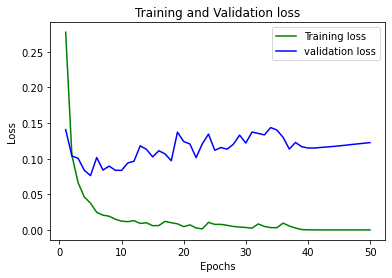

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*Το validation loss αυξανεται συνεχώς απο την στιγμή που το δίκτυο "΄εμαθε" το train set*

**Προσθέτω άλλο ενα layer με 512 κρυμμένα στοιχεία για περισσότερο deep learning**

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train2, y_train2, epochs=50, batch_size=128,validation_data=(x_val, y_val))

Epoch 1/50
422/422 [==============================] - 5s 10ms/step - loss: 0.2552 - accuracy: 0.9254 - val_loss: 0.1374 - val_accuracy: 0.9588
Epoch 2/50
422/422 [==============================] - 4s 10ms/step - loss: 0.0949 - accuracy: 0.9707 - val_loss: 0.1137 - val_accuracy: 0.9663
Epoch 3/50
422/422 [==============================] - 4s 9ms/step - loss: 0.0633 - accuracy: 0.9807 - val_loss: 0.0887 - val_accuracy: 0.9718
Epoch 4/50
422/422 [==============================] - 4s 9ms/step - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.1106 - val_accuracy: 0.9695
Epoch 5/50
422/422 [==============================] - 4s 10ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.1126 - val_accuracy: 0.9715
Epoch 6/50
422/422 [==============================] - 4s 9ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0854 - val_accuracy: 0.9773
Epoch 7/50
422/422 [==============================] - 4s 10ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.1162 - val_accuracy: 0.9703
Ep

**Ακόμη χειρότερα αποτελέσματα**

*Χρόνος εκτέλεσης : 3,5λεπτά*

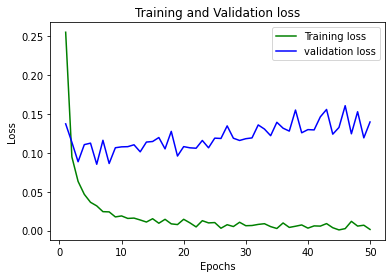

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*Συνεχίζεται το ίδιο πρόβλημα*

**Θα δοκιμάσω να πάω αρκετα βαθιά αυτήν την φορά**

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train2, y_train2, epochs=50, batch_size=128,validation_data=(x_val, y_val))

Epoch 1/50
422/422 [==============================] - 14s 30ms/step - loss: 0.2901 - accuracy: 0.9115 - val_loss: 0.1521 - val_accuracy: 0.9558
Epoch 2/50
422/422 [==============================] - 12s 28ms/step - loss: 0.1160 - accuracy: 0.9666 - val_loss: 0.1384 - val_accuracy: 0.9632
Epoch 3/50
422/422 [==============================] - 13s 31ms/step - loss: 0.0844 - accuracy: 0.9749 - val_loss: 0.1281 - val_accuracy: 0.9645
Epoch 4/50
422/422 [==============================] - 13s 31ms/step - loss: 0.0688 - accuracy: 0.9797 - val_loss: 0.1244 - val_accuracy: 0.9693
Epoch 5/50
422/422 [==============================] - 12s 29ms/step - loss: 0.0593 - accuracy: 0.9834 - val_loss: 0.1294 - val_accuracy: 0.9660
Epoch 6/50
422/422 [==============================] - 12s 28ms/step - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.1067 - val_accuracy: 0.9722
Epoch 7/50
422/422 [==============================] - 12s 28ms/step - loss: 0.0467 - accuracy: 0.9865 - val_loss: 0.1071 - val_accuracy:

**Φαίνεται πως το δίκτυο δεν αποδίδει καλά στο validation set πιθανόν να έχουμε overfitting**

*Χρόνος εκτέλεσης : 10λεπτά*

**Δοκιμάζω να προσθέσω dropout**

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train2, y_train2, epochs=50, batch_size=128,validation_data=(x_val, y_val))

Epoch 1/50
422/422 [==============================] - 5s 11ms/step - loss: 0.4878 - accuracy: 0.8467 - val_loss: 0.1676 - val_accuracy: 0.9500
Epoch 2/50
422/422 [==============================] - 4s 11ms/step - loss: 0.2205 - accuracy: 0.9343 - val_loss: 0.1322 - val_accuracy: 0.9603
Epoch 3/50
422/422 [==============================] - 4s 10ms/step - loss: 0.1748 - accuracy: 0.9478 - val_loss: 0.1245 - val_accuracy: 0.9645
Epoch 4/50
422/422 [==============================] - 5s 12ms/step - loss: 0.1516 - accuracy: 0.9545 - val_loss: 0.1041 - val_accuracy: 0.9695
Epoch 5/50
422/422 [==============================] - 4s 11ms/step - loss: 0.1313 - accuracy: 0.9606 - val_loss: 0.0980 - val_accuracy: 0.9728
Epoch 6/50
422/422 [==============================] - 4s 10ms/step - loss: 0.1256 - accuracy: 0.9626 - val_loss: 0.0986 - val_accuracy: 0.9712
Epoch 7/50
422/422 [==============================] - 5s 11ms/step - loss: 0.1121 - accuracy: 0.9651 - val_loss: 0.0927 - val_accuracy: 0.9742

**Χρησιμοποιώντας dropout σε κάθε layer κατάφερα να διασφαλίσω ότι το δίκτυο δεν θα κάνει overfit , όπως φαίνεται παρακάτω στο γράφημα το αποτέλεσμα είναι αρκετά καλύτερο με dropout αλλά σίγουρα όχι όσο καλώ θα ήθελα**

*Χρόνος εκτέλεσης : 3,5λεπτά*

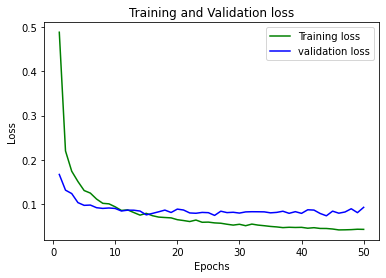

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Δοκιμάζω το απλό 3layer με dropout**

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.65))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.65))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train2, y_train2, epochs=50, batch_size=128,validation_data=(x_val, y_val))

Epoch 1/50
422/422 [==============================] - 4s 8ms/step - loss: 0.6790 - accuracy: 0.7839 - val_loss: 0.2211 - val_accuracy: 0.9357
Epoch 2/50
422/422 [==============================] - 3s 7ms/step - loss: 0.3231 - accuracy: 0.9042 - val_loss: 0.1681 - val_accuracy: 0.9525
Epoch 3/50
422/422 [==============================] - 3s 8ms/step - loss: 0.2667 - accuracy: 0.9212 - val_loss: 0.1477 - val_accuracy: 0.9575
Epoch 4/50
422/422 [==============================] - 3s 8ms/step - loss: 0.2326 - accuracy: 0.9319 - val_loss: 0.1306 - val_accuracy: 0.9620
Epoch 5/50
422/422 [==============================] - 3s 7ms/step - loss: 0.2133 - accuracy: 0.9385 - val_loss: 0.1212 - val_accuracy: 0.9645
Epoch 6/50
422/422 [==============================] - 3s 7ms/step - loss: 0.1980 - accuracy: 0.9421 - val_loss: 0.1182 - val_accuracy: 0.9647
Epoch 7/50
422/422 [==============================] - 3s 8ms/step - loss: 0.1790 - accuracy: 0.9474 - val_loss: 0.1066 - val_accuracy: 0.9700
Epoch 

**το απλό δίκτυο με 3layer και dropout=0.65 φαίνεται πώς έχει μέλλον όπως φαίνεται στο γράφημα δεν παπαγαλίζει σχεδόν καθόλου και έχει πολύ χώρο ακόμα για μάθηση**

*Χρόνος εκτέλεσης : 2,5λεπτά*

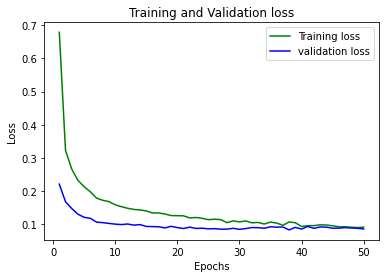

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Επομένως αξίζει να δούμε τι αποτέσμα θα μας δώσει αν το αφήσουμε να εκπαιδευτεί για πολλές εποχες , δοκιμάζω με 1000 εποχές (θα πάρει πολύ χρόνο)**

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.65))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.65))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train2, y_train2, epochs=1000, batch_size=128,validation_data=(x_val, y_val))

Epoch 1/1000
422/422 [==============================] - 4s 7ms/step - loss: 0.6825 - accuracy: 0.7843 - val_loss: 0.2215 - val_accuracy: 0.9322
Epoch 2/1000
422/422 [==============================] - 3s 7ms/step - loss: 0.3251 - accuracy: 0.9058 - val_loss: 0.1640 - val_accuracy: 0.9520
Epoch 3/1000
422/422 [==============================] - 3s 7ms/step - loss: 0.2623 - accuracy: 0.9242 - val_loss: 0.1466 - val_accuracy: 0.9585
Epoch 4/1000
422/422 [==============================] - 4s 9ms/step - loss: 0.2334 - accuracy: 0.9324 - val_loss: 0.1365 - val_accuracy: 0.9618
Epoch 5/1000
422/422 [==============================] - 4s 9ms/step - loss: 0.2120 - accuracy: 0.9385 - val_loss: 0.1239 - val_accuracy: 0.9642
Epoch 6/1000
422/422 [==============================] - 4s 10ms/step - loss: 0.1944 - accuracy: 0.9434 - val_loss: 0.1121 - val_accuracy: 0.9672
Epoch 7/1000
422/422 [==============================] - 4s 9ms/step - loss: 0.1801 - accuracy: 0.9476 - val_loss: 0.1084 - val_accuracy

*Χρόνος εκτέλεσης : 65λεπτά*

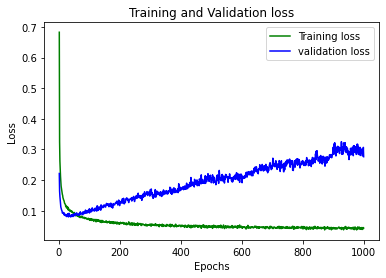

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,1001)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*Όπως φαίνεται στο γράφημα μέχρι περίπου τις 60-70 εποχές το train loss συμβαδίζει με το validation loss*

**Δοκιμάζω να αυξήσω τα κρυμμένα units απο 256 σε 1024 με dropout 0.5 σε καθένα απο τα 2 layers για 100 εποχές με 256 batch size**

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train2, y_train2, epochs=100, batch_size=2*128,validation_data=(x_val, y_val))

Epoch 1/100
211/211 [==============================] - 13s 55ms/step - loss: 0.3268 - accuracy: 0.9000 - val_loss: 0.1333 - val_accuracy: 0.9612
Epoch 2/100
211/211 [==============================] - 12s 55ms/step - loss: 0.1385 - accuracy: 0.9577 - val_loss: 0.1036 - val_accuracy: 0.9673
Epoch 3/100
211/211 [==============================] - 12s 55ms/step - loss: 0.1035 - accuracy: 0.9674 - val_loss: 0.0931 - val_accuracy: 0.9710
Epoch 4/100
211/211 [==============================] - 12s 55ms/step - loss: 0.0869 - accuracy: 0.9721 - val_loss: 0.0823 - val_accuracy: 0.9747
Epoch 5/100
211/211 [==============================] - 12s 55ms/step - loss: 0.0746 - accuracy: 0.9764 - val_loss: 0.0843 - val_accuracy: 0.9757
Epoch 6/100
211/211 [==============================] - 12s 55ms/step - loss: 0.0652 - accuracy: 0.9788 - val_loss: 0.0809 - val_accuracy: 0.9747
Epoch 7/100
211/211 [==============================] - 12s 55ms/step - loss: 0.0591 - accuracy: 0.9807 - val_loss: 0.0779 - val_ac

**Έχουμε 98.4% ακρίβεια**

*Χρόνος εκτέλεσης : 20λεπτά*

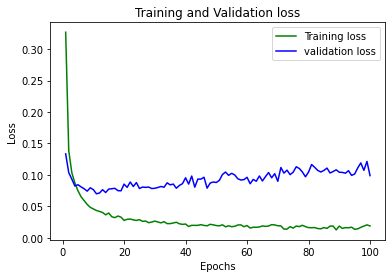

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Το δίκτυο δεν είναι τέλειο όμως έχει φτάσει σε ένα καλό επίπεδο και είναι η στιγμή που θα το εκπαιδεύσω σε όλοκληρο το dataset για να ελέγξω το testset**

*ΠΡΩΤΟΣ ΕΛΕΓΧΟΣ ΣΤΟ TEST SET*

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=100, batch_size=2*128,validation_data=(x_test, y_test))

Epoch 1/100
235/235 [==============================] - 15s 62ms/step - loss: 0.3106 - accuracy: 0.9054 - val_loss: 0.1137 - val_accuracy: 0.9656
Epoch 2/100
235/235 [==============================] - 14s 59ms/step - loss: 0.1355 - accuracy: 0.9582 - val_loss: 0.0831 - val_accuracy: 0.9733
Epoch 3/100
235/235 [==============================] - 15s 63ms/step - loss: 0.1060 - accuracy: 0.9671 - val_loss: 0.0695 - val_accuracy: 0.9791
Epoch 4/100
235/235 [==============================] - 15s 62ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0666 - val_accuracy: 0.9782
Epoch 5/100
235/235 [==============================] - 14s 61ms/step - loss: 0.0734 - accuracy: 0.9767 - val_loss: 0.0622 - val_accuracy: 0.9806
Epoch 6/100
235/235 [==============================] - 13s 56ms/step - loss: 0.0653 - accuracy: 0.9788 - val_loss: 0.0573 - val_accuracy: 0.9834
Epoch 7/100
235/235 [==============================] - 14s 59ms/step - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.0683 - val_ac

**Φτάσαμε το 98.51% , με 99.52% στο trainning set**

*Χρόνος εκτέλεσης : 25λεπτά*

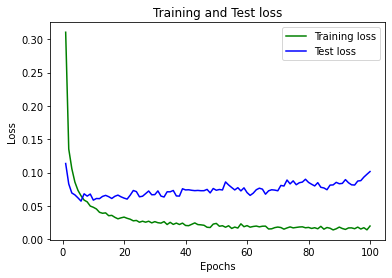

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

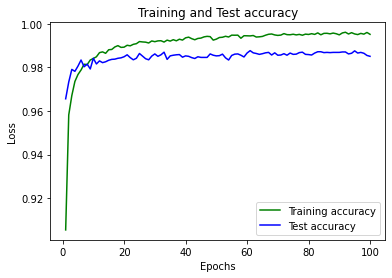

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*Παρατηρήσεις-Σχόλια*

**Αρχικά όπως φαίνεται και στο παραπάνω γράφημα το δίκτυο φτάνει 98%+ (στο test set) απο την 20ή κιόλας εποχή ,μάλιστα σε κάποια σημεία (πχ εποχή 25-30 και 55-60 έτεινε στο 99% επομένως οι 100 εποχές ίσως και να είναι πλεονασμός.Έτσι και αλλιώς απο το γράφημα φαίνεται μια πτώση απο την εποχη 90 και έπειτα. Σε αυτο που θέλω να καταλήξω είναι ότι το πλήθος των εποχών το βρίσκουμε καθώς εκπαιδεύουμε το δίκτυο μας και ότι περισσότερες εποχές δεν δίνουν πάντοτε καλύτερα αποτελέσματα .
  Το επόμενο σημαντικό σχόλιο που θέλω να κάνω έχει να κάνει με το dropout. Όπως φάνηκε απο τα πρώτα παραδείγματα ότι δικτύο εκπαίδευσα χωρίς dropout έτεινε να μαθαίνει το trainning set πολύ γρήγορα στο 100% με αποτέλεσμα να μην μπορεί να βελτιώθει καθόλου απο ένα σημείο και μετά στο validation set. Το dropout λύνει κατά κάποιο τρόπο το πρόβλημα αυτό (overfitting). Παρατήρησα ότι για πολύ μικρές τιμές στο dropout (πχ μικρότερες του 0.4) το δίκτυο τύνει πάλι να οδηγείται σε overfitting απλά λίγο πιο αργά σε σχέση με πρίν. Αντίθετα με πολύ μεγάλο dropout (0.65+) trainning και validation έφταναν απο την πρώτη κιόλας εποχή σε ακρίβεια 97%+ και μέναν στάσιμα σε αυτό . Τα καλύτερα αποτελέσματα τα έφτασα με dropout από 0.45 έως 0.60.**

# ***ΠΕΙΡΑΜΑΤΑ ΜΕ ΤΟ ΠΛΗΘΟΣ ΤΟΥ TRAINNING SET***

*θα δοκιμάσω να μικρύνω το δείγμα του train για να ελέγξω πόσο επιρεάζεται η ακρίβεια στο test set*

**Θα χρησιμοποιήσω το απλό δίκτυο τριών layer για 20 εποχες**

In [ ]:
def MLP3layer(x_train,y_train): #φτιάχνω συνάρτηση διότι θα χρησιμοποιήσω ακριβώς το ίδιο δίκτυο για διαφορετικά datasets
  model = Sequential()
  model.add(Dense(256, input_dim=784))
  model.add(Activation('relu'))
  model.add(Dropout(0.45))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dropout(0.45))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=20, batch_size=128,validation_data=(x_test, y_test))

*Αρχικά με όλα τα δείγματα 60000*

In [ ]:
x_train2=x_train
y_train2=y_train
MLP3layer(x_train2,y_train2)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4199 - accuracy: 0.8720 - val_loss: 0.1429 - val_accuracy: 0.9556
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1936 - accuracy: 0.9422 - val_loss: 0.1064 - val_accuracy: 0.9664
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1501 - accuracy: 0.9552 - val_loss: 0.0896 - val_accuracy: 0.9722
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1275 - accuracy: 0.9620 - val_loss: 0.0813 - val_accuracy: 0.9746
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1147 - accuracy: 0.9649 - val_loss: 0.0757 - val_accuracy: 0.9779
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1023 - accuracy: 0.9682 - val_loss: 0.0712 - val_accuracy: 0.9779
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0923 - accuracy: 0.9719 - val_loss: 0.0692 - val_accuracy: 0.9786
Epoch

**Έχουμε 98.31% αρκετά καλό για μόνο 20 επόχες και χρόνο εκτέλεσης 1,5 λεπτά**

*48000 trainning set*

In [ ]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1) #20% val 80% train (0.8*60000=48000)
MLP3layer(x_train2,y_train2)

Epoch 1/20
375/375 [==============================] - 3s 8ms/step - loss: 0.4738 - accuracy: 0.8528 - val_loss: 0.1625 - val_accuracy: 0.9516
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2123 - accuracy: 0.9363 - val_loss: 0.1190 - val_accuracy: 0.9625
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1644 - accuracy: 0.9500 - val_loss: 0.1012 - val_accuracy: 0.9705
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1390 - accuracy: 0.9575 - val_loss: 0.0886 - val_accuracy: 0.9732
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1235 - accuracy: 0.9620 - val_loss: 0.0835 - val_accuracy: 0.9753
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1068 - accuracy: 0.9671 - val_loss: 0.0824 - val_accuracy: 0.9753
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0949 - accuracy: 0.9706 - val_loss: 0.0761 - val_accuracy: 0.9767
Epoch 

**Με 48000 δείγματα κατάφεραι να φτάσει σε ακρίβεια 98.1% (πολύ μικρή αλλά ασθητή η διαφορά)**

*Δοκιμή με 30000 δείγματα*

In [ ]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.5, random_state=1) #50% val 50% train (0.5*60000=30000)
MLP3layer(x_train2,y_train2)

Epoch 1/20
235/235 [==============================] - 3s 10ms/step - loss: 0.5906 - accuracy: 0.8156 - val_loss: 0.2064 - val_accuracy: 0.9383
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.2526 - accuracy: 0.9245 - val_loss: 0.1566 - val_accuracy: 0.9528
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1916 - accuracy: 0.9429 - val_loss: 0.1223 - val_accuracy: 0.9619
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1642 - accuracy: 0.9510 - val_loss: 0.1124 - val_accuracy: 0.9653
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1353 - accuracy: 0.9574 - val_loss: 0.1064 - val_accuracy: 0.9660
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1247 - accuracy: 0.9624 - val_loss: 0.0978 - val_accuracy: 0.9707
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1115 - accuracy: 0.9655 - val_loss: 0.0917 - val_accuracy: 0.9723
Epoch

**30000 δείνουν 97.65% ακρίβεια**

*Δοκιμή με 12000 δείγματα*

In [ ]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.8, random_state=1) #80% val 20% train (0.2*60000=12000)
MLP3layer(x_train2,y_train2)

Epoch 1/20
94/94 [==============================] - 2s 15ms/step - loss: 0.9111 - accuracy: 0.7099 - val_loss: 0.3134 - val_accuracy: 0.9079
Epoch 2/20
94/94 [==============================] - 1s 11ms/step - loss: 0.3874 - accuracy: 0.8816 - val_loss: 0.2406 - val_accuracy: 0.9279
Epoch 3/20
94/94 [==============================] - 1s 11ms/step - loss: 0.2881 - accuracy: 0.9145 - val_loss: 0.2132 - val_accuracy: 0.9341
Epoch 4/20
94/94 [==============================] - 1s 11ms/step - loss: 0.2393 - accuracy: 0.9280 - val_loss: 0.1758 - val_accuracy: 0.9451
Epoch 5/20
94/94 [==============================] - 1s 10ms/step - loss: 0.2046 - accuracy: 0.9388 - val_loss: 0.1661 - val_accuracy: 0.9488
Epoch 6/20
94/94 [==============================] - 1s 11ms/step - loss: 0.1707 - accuracy: 0.9483 - val_loss: 0.1515 - val_accuracy: 0.9541
Epoch 7/20
94/94 [==============================] - 1s 10ms/step - loss: 0.1545 - accuracy: 0.9522 - val_loss: 0.1388 - val_accuracy: 0.9578
Epoch 8/20
94

**Με 12000 δείγματα φτάνουμε ακρίβεια 96.63% μέχρι στιγμής έχουμε ρίξει την ακρίνεια περίπου 2%**

*Δοκιμή με 6000 δείγματα*

In [ ]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.9, random_state=1) #90% val 10% train (0.1*60000=6000)
MLP3layer(x_train2,y_train2)

Epoch 1/20
47/47 [==============================] - 1s 16ms/step - loss: 1.2449 - accuracy: 0.6018 - val_loss: 0.4435 - val_accuracy: 0.8730
Epoch 2/20
47/47 [==============================] - 1s 14ms/step - loss: 0.5311 - accuracy: 0.8375 - val_loss: 0.3122 - val_accuracy: 0.9063
Epoch 3/20
47/47 [==============================] - 1s 13ms/step - loss: 0.3970 - accuracy: 0.8782 - val_loss: 0.2530 - val_accuracy: 0.9248
Epoch 4/20
47/47 [==============================] - 1s 11ms/step - loss: 0.3170 - accuracy: 0.9033 - val_loss: 0.2342 - val_accuracy: 0.9285
Epoch 5/20
47/47 [==============================] - 1s 14ms/step - loss: 0.2618 - accuracy: 0.9228 - val_loss: 0.2104 - val_accuracy: 0.9343
Epoch 6/20
47/47 [==============================] - 1s 15ms/step - loss: 0.2283 - accuracy: 0.9288 - val_loss: 0.1924 - val_accuracy: 0.9402
Epoch 7/20
47/47 [==============================] - 1s 14ms/step - loss: 0.2019 - accuracy: 0.9383 - val_loss: 0.1843 - val_accuracy: 0.9445
Epoch 8/20
47

**95.67% ακρίβεια**

*Τελευταία δοκιμή με μόλις 600 δείγματα*

In [ ]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.99, random_state=1) #99% val 1% train (0.01*60000=600)
MLP3layer(x_train2,y_train2)

Epoch 1/20
5/5 [==============================] - 1s 107ms/step - loss: 2.2682 - accuracy: 0.1550 - val_loss: 1.9302 - val_accuracy: 0.5487
Epoch 2/20
5/5 [==============================] - 0s 71ms/step - loss: 1.8914 - accuracy: 0.3983 - val_loss: 1.5998 - val_accuracy: 0.6053
Epoch 3/20
5/5 [==============================] - 0s 87ms/step - loss: 1.5478 - accuracy: 0.5633 - val_loss: 1.2199 - val_accuracy: 0.7020
Epoch 4/20
5/5 [==============================] - 0s 72ms/step - loss: 1.2574 - accuracy: 0.6217 - val_loss: 0.9234 - val_accuracy: 0.7732
Epoch 5/20
5/5 [==============================] - 0s 71ms/step - loss: 0.9970 - accuracy: 0.6867 - val_loss: 0.7408 - val_accuracy: 0.7998
Epoch 6/20
5/5 [==============================] - 0s 88ms/step - loss: 0.9197 - accuracy: 0.7033 - val_loss: 0.6341 - val_accuracy: 0.8106
Epoch 7/20
5/5 [==============================] - 0s 87ms/step - loss: 0.7794 - accuracy: 0.7467 - val_loss: 0.5545 - val_accuracy: 0.8351
Epoch 8/20
5/5 [==========

**Πέσαμε κάτω απο 90%**

*Συνολική εικόνα για τα πλήθη του trainning*

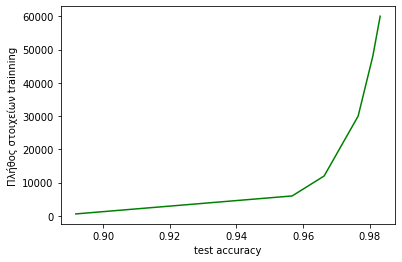

In [ ]:
xset=[0.9831,0.9809,0.9765,0.9663,0.9567,0.8918]
yset=[60000,48000,30000,12000,6000,600]
plt.plot(xset,yset,  'g')
plt.ylabel('Πλήθος στοιχείων trainning')
plt.xlabel('test accuracy')
plt.show()

*Αυτό που παρατηρούμε είναι ότι ένα MLP μπορεί να πιάσει πολύ μεγάλη ακρίβεια (>95%) με λιγότερα απο 10000 στοιχεία για εκπαίδευση , μάλιστα φτάνει σχεδόν 90% με μόλις 600 στοιχεία ! Δηλαδή ακόμη και έτσι είναι καλύτερος του Nearest Centroid*

# **Μερικές δοκιμές με διαφορετικά activation πχ(sigmoid,tanh)**

In [ ]:
def activationTesting(act1,act2):  # απλο 3layer δίκτυο με dropout 50 εποχές και batch size 128
  model = Sequential()
  model.add(Dense(256, input_dim=784))
  model.add(Activation(act1))
  model.add(Dropout(0.45))
  model.add(Dense(256))
  model.add(Activation(act2))
  model.add(Dropout(0.45))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

  test = model.fit(x_train, y_train, epochs=50, batch_size=128,validation_data=(x_test, y_test))
  return test

*δοκιμή με sigmoid*

In [ ]:
test=activationTesting('sigmoid','sigmoid')

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.8052 - accuracy: 0.7464 - val_loss: 0.2946 - val_accuracy: 0.9127
Epoch 2/50
469/469 [==============================] - 4s 7ms/step - loss: 0.3401 - accuracy: 0.8973 - val_loss: 0.2238 - val_accuracy: 0.9318
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2684 - accuracy: 0.9192 - val_loss: 0.1844 - val_accuracy: 0.9435
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2273 - accuracy: 0.9323 - val_loss: 0.1558 - val_accuracy: 0.9530
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1964 - accuracy: 0.9401 - val_loss: 0.1365 - val_accuracy: 0.9577
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1745 - accuracy: 0.9475 - val_loss: 0.1215 - val_accuracy: 0.9629
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1592 - accuracy: 0.9527 - val_loss: 0.1090 - val_accuracy: 0.9662
Epoch 

**98.32% accuracy**

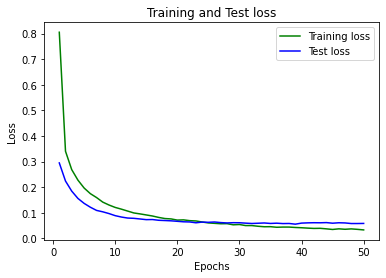

In [ ]:
loss_train = test.history['loss']
loss_val = test.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

*δοκιμή με tanh*

In [ ]:
test=activationTesting('tanh','tanh')

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.4347 - accuracy: 0.8686 - val_loss: 0.2520 - val_accuracy: 0.9267
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2922 - accuracy: 0.9115 - val_loss: 0.1930 - val_accuracy: 0.9414
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2384 - accuracy: 0.9282 - val_loss: 0.1586 - val_accuracy: 0.9535
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2048 - accuracy: 0.9385 - val_loss: 0.1467 - val_accuracy: 0.9559
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1818 - accuracy: 0.9440 - val_loss: 0.1258 - val_accuracy: 0.9617
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1698 - accuracy: 0.9485 - val_loss: 0.1184 - val_accuracy: 0.9648
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1527 - accuracy: 0.9523 - val_loss: 0.1041 - val_accuracy: 0.9685
Epoch 

**98.08% accuracy**

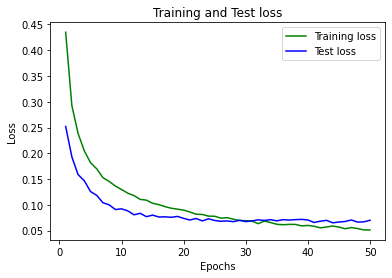

In [ ]:
loss_train = test.history['loss']
loss_val = test.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **ΣΥΝΕΛΙΚΤΙΚΟ ΔΙΚΤΥΟ**

In [ ]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense , Activation, MaxPool2D, Conv2D, Flatten
from keras.optimizers import Adam


# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

results = model.fit(x_train, y_train, epochs=20, batch_size=128,validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 157s 330ms/step - loss: 0.1457 - accuracy: 0.9541 - val_loss: 0.0411 - val_accuracy: 0.9876
Epoch 2/20
469/469 [==============================] - 164s 349ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0352 - val_accuracy: 0.9891
Epoch 3/20
469/469 [==============================] - 161s 343ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0281 - val_accuracy: 0.9910
Epoch 4/20
469/469 [==============================] - 160s 342ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0291 - val_accuracy: 0.9908
Epoch 5/20
469/469 [==============================] - 157s 334ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0255 - val_accuracy: 0.9917
Epoch 6/20
469/469 [==============================] - 151s 323ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0246 - val_accuracy: 0.9922
Epoch 7/20
469/469 [==============================] - 167s 357ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0214 -

**Βλέπουμε ότι το συνελικτικό δίκτυο κατάφεραι να ξεπεράσει με ευκολία το 99% , συγκεκριμένα έχει ακρίβεια 99.29% σε μόλις 20 εποχές.**

*Με χρόνο εκτέλεσης : 50λεπτά*

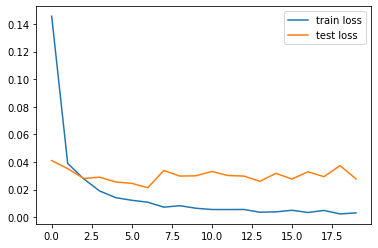

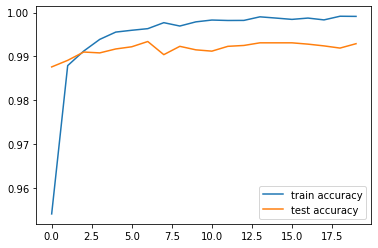

In [ ]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train accuracy', 'test accuracy'])

# **Σχολιασμοί - Συγκρίσεις**

Αρχικά όπως θα περιμέναμε το συνελικτικό δίκτυο κατέληξε σε πολύ μεγαλύτερη ακρίβεια (99.3%) απο αυτή του MLP (98.5%) . Αυτό διότι το MLP χειρίζεται τις εικόνες σαν διανύσματα στην είσοδο του ενώ το συνελικτικό δίκτυο παίρνει σαν είσοδο τανυστή (tensor) δίνοντας του την δυνατότητα να κατανοεί καλύτερα τον χώρο και έτσι σε περίπλοκες εικόνες να αποδίδει καλύτερα .
  Το mlp παρατήρησα πως έφτανε πάρα πολύ εύκολα σε ακρίβεια 98% , όμως χρειαζόταν πολύ καλές αρχικοποιήσεις και φυσικά dropout έπειτα απο κάθε layer καθώς έφτανε στο σημείο του overfitting πολύ εύκολα.Επίσης, παρέμενε πολύ ανθεκτικό ώς προς την ακρίβεια του ακομή και με πολύ λιγοτερά στοιχεία για εκπαίδευση (6000).
  Τέλος , παρότι ο KNN απο την ενδιάμεση εργασία είναι ένας πάρα πολύ απλός classifier τα πήγε πάρα πολύ καλά (97.05%) δεν μπορεί να συγκριθεί με το mlp , αυτό διότι ο knn σε αντίθεση με τα νευρωνικά δίκτυο δεν μπορεί να εκπαιδευτεί , αυτό που κάνει είναι εκτιμήσεις και με βάση τα δεδομένα του καταλήγει σε συγκεκριμένα αποτελέσματα χώρις να μπορεί να μάθει απο λάθη όπως τα νευρωνικά.
Το ίδιο ισχύει και για τον nearest centroid ο οποίος δεν μπορει να συγκριθεί ούτε με τα αποτελέσματα που πέτυχε ο mlp με 600 μόνο δεδομένα .
